# The Sparks Foundation : Data Science and Business Analytics Internship

Task 1


Name     : Mariya Biju

IDE      : Google Colab

Language : Python 3

Ex       : Linear Regression

# Loading the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the Data

In [2]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.shape

(25, 2)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
# Checking for duplicate values.
data.duplicated().any()

False

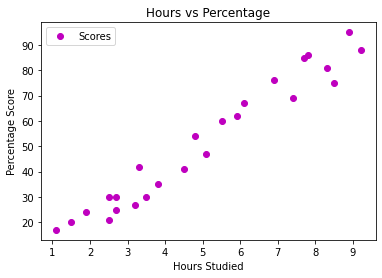

In [15]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='mo')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

There is a positive linear relation between the number of hours studied and percentage of score.

In [16]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


The correlation coefficient is 0.97 which shows a strong positive correlation.

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


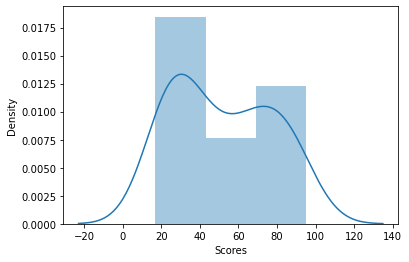

In [17]:
sns.distplot(data["Scores"])

F:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


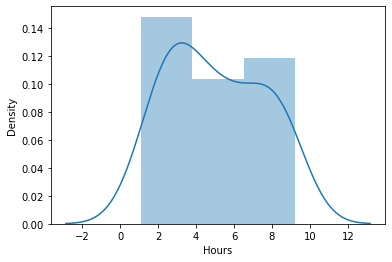

In [18]:
sns.distplot(data["Hours"])

It is observed that both the variables are following a normal distribution.

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


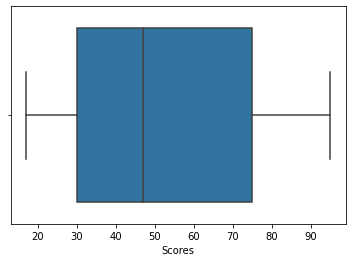

In [19]:
sns.boxplot(data["Scores"])

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


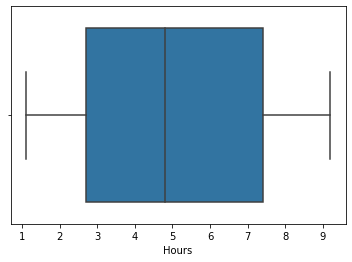

In [20]:
sns.boxplot(data["Hours"])

There is no outliers for the 2 given variables.

# Linear Regression

In [22]:
import sklearn.model_selection as ms

In [24]:
X = data.drop('Scores',axis=1) 
y = data['Scores']

In [25]:
x_train,x_test,y_train,y_test=ms.train_test_split(X,y,test_size=0.2, random_state=0) 

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20, 1), (5, 1), (20,), (5,))

In [27]:
 import sklearn.linear_model as lm

In [28]:
glm=lm.LinearRegression()

In [29]:
glm.fit(x_train,y_train)

LinearRegression()

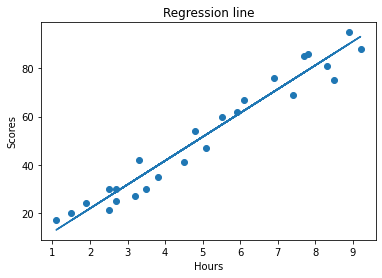

In [31]:
regre_line = glm.intercept_ + X * glm.coef_

plt.scatter(X, y)
plt.plot(X, regre_line)
plt.title("Regression line")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [36]:
y_predict = glm.predict(x_test)

In [37]:
pd.DataFrame({"Actual": y_test, "Predicted": y_predict})

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [38]:
glm.score(x_test,y_test)

0.9454906892105356

In [39]:
glm.score(x_train,y_train)

0.9515510725211552

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [41]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))
print('R2 value: ', r2_score(y_test, y_predict))

Mean Absolute Error: 4.183859899002975
R2 value:  0.9454906892105356


In [42]:
hours = 9.25
glm.predict([[hours]])

array([93.69173249])

Therefore, our model predicts that the score of a student who studies for 9.25 hours per day would be 93.15%.